<b><font size = 3 color = green> <center>TULASI RAMARAO IS620 ( Web Analytics) </font> </center> </b><br><br>
<b>Week 6 Assignment: <br>
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis.   [For more background information, see also: http://rpackages.ianhowson.com/cran/latentnet/man/davis.html].  Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
Python code to create dataset: https://networkx.github.io/documentation/latest/examples/algorithms/davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?  

Please provide your code and analysis in an IPython notebook stored in your GitHub repository.

If we are interested in analyzing connections between a group of women based on their attendance to social events, then we can convert their attendance data in these events(women by club) to women to women kind. 

Bipartite relationships between 2 sets of items - Women and Events, has  binary relation that has connected them by an 'attended' relation.[ rows = women, columns = events]. 

Here, by design, the assumption was that there was no relationship within the set, like from one women to another woman. The purpose to collect this data was to understand the pattern within each set, not from one set to another. However, with the extra information of relationships/patterns between these two sets, some kind of a tie can be constructed among members of a set by defining a relationship. For example: Create a tie if and only if two women attended the same event.      
This kind of analysis works only for small datasets like small number of clubs or events. If its a huge set, then two women may be attending all these 100s of events, but not know each other at all.    
Ref: http://www.bebr.ufl.edu/sites/default/files/Analyzing%20affiliation%20networks.pdf    

Island method: To analyze the network with a number of distinct clusters, island method from "Islands in the Net" on Page 62 is used. First finding the values from the histogram of edge values will tell where the 'water level' should be. 
 

In [48]:
# do the necessary leg work of importing and setting environments
%pylab inline
import sys
sys.path.append('/Users/tulasiramarao/anaconda/lib/python2.7/site-packages/')
import networkx as nx
import csv
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [49]:
#!/usr/bin/env python
"""
Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al
in the 1930s.  They represent observed attendance at 14 social events
by 18 Southern women.  The graph is bipartite (clubs, women).

Data from:
http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm

"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
__date__ = "$Date: 2005-05-12 14:33:11 -0600 (Thu, 12 May 2005) $"
__credits__ = """"""
__revision__ = "$Revision: 998 $"
#    Copyright (C) 2004 by 
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import string
import networkx as nx

def davis_club_graph(create_using=None, **kwds):
    nwomen=14
    nclubs=18
    G=nx.generators.empty_graph(nwomen+nclubs,create_using=create_using,**kwds)
    G.clear()
    G.name="Davis Southern Club Women"

    women="""\
EVELYN
LAURA
THERESA
BRENDA
CHARLOTTE
FRANCES
ELEANOR
PEARL
RUTH
VERNE
MYRNA
KATHERINE
SYLVIA
NORA
HELEN
DOROTHY
OLIVIA
FLORA"""

    clubs="""\
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14"""

    davisdat="""\
1 1 1 1 1 1 0 1 1 0 0 0 0 0
1 1 1 0 1 1 1 1 0 0 0 0 0 0
0 1 1 1 1 1 1 1 1 0 0 0 0 0
1 0 1 1 1 1 1 1 0 0 0 0 0 0
0 0 1 1 1 0 1 0 0 0 0 0 0 0
0 0 1 0 1 1 0 1 0 0 0 0 0 0
0 0 0 0 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 1 0 1 1 0 0 0 0 0
0 0 0 0 1 0 1 1 1 0 0 0 0 0
0 0 0 0 0 0 1 1 1 0 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 1 1
0 0 0 0 0 0 1 1 1 1 0 1 1 1
0 0 0 0 0 1 1 0 1 1 1 1 1 1
0 0 0 0 0 0 1 1 0 1 1 1 1 1
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0"""


    # women names
    w={}
    n=0
    for name in women.split('\n'):
        w[n]=name
        n+=1

    # club names        
    c={}
    n=0
    for name in clubs.split('\n'):
        c[n]=name
        n+=1

    print("Hello2",type(davisdat))
    # parse matrix         
    row=0
    for line in davisdat.split('\n'):
        thisrow=list(map(int,line.split(' ')))
        for col in range(0,len(thisrow)):
            if thisrow[col]==1:
                G.add_edge(w[row],c[col])
        row+=1
    return (G,list(w.values()),list(c.values()))

def project(B,pv,result=False,**kwds):
    """
    Returns a graph that is the unipartite projection of the
    bipartite graph B onto the set of nodes given in list pv.
    
    The nodes retain their names and are connected if they share a
    common node in the vertex set of {B not pv}.
 
    No attempt is made to verify that the input graph B is bipartite.
    """
    if result:
        G=result
    else:
        G=nx.Graph(**kwds)
    for v in pv:
        G.add_node(v)
        for cv in B.neighbors(v):
            G.add_edges_from([(v,u) for u in B.neighbors(cv)])
    return G


In [50]:

def davis_club_graph2(create_using=None, **kwds):
    nwomen=14
    nclubs=18
    G=nx.generators.empty_graph(nwomen+nclubs,create_using=create_using,**kwds)
    G.clear()
    G.name="Davis Southern Club Women"

    women="""\
EVELYN
LAURA
THERESA
BRENDA
CHARLOTTE
FRANCES
ELEANOR
PEARL
RUTH
VERNE
MYRNA
KATHERINE
SYLVIA
NORA
HELEN
DOROTHY
OLIVIA
FLORA"""

    clubs="""\
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14"""

 

    # women names
    w={}
    n=0
    for name in women.split('\n'):
        w[n]=name
        n+=1

    # club names        
    c={}
    n=0
    for name in clubs.split('\n'):
        c[n]=name
        n+=1
     
    
    davisdatstr = ''
    with open('normalized.csv', 'rU') as csvfile:
        davisdat = csv.reader(csvfile)#, delimiter=',')
        for row in davisdat:
            print (', ').join(row)
            davisdatstr = davisdatstr.join(', ').join(row)
        #print(davisdatstr)
        #print("Hello",type(davisdatstr))
        # parse matrix         
        row=0
        for line in davisdatstr.split('\n'):
            thisrow=list(map(double,line.split(',')))
            for col in range(0,len(thisrow)):
                if thisrow[col]==1:
                    G.add_edge(w[row],c[col])
            row+=1
        return (G,list(w.values()),list(c.values()))




In [51]:

from networkx.algorithms import bipartite as bi

In [52]:
if __name__ == "__main__":
    
    # return graph and women and clubs lists
    (G,women,clubs)=davis_club_graph()

    # project bipartite graph onto women nodes
    W=project(G,women)
    # project bipartite graph onto club nodes
    C=project(G,clubs)

    print("Degree distributions of projected graphs")
    print('') 
    print("Member #Friends")
    for v in W:
        print('%s %d' % (v,W.degree(v)))

    print('') 
    print("Clubs #Members")
    for v in C:
        print('%s %d' % (v,C.degree(v)))
        


('Hello2', <type 'str'>)
Degree distributions of projected graphs

Member #Friends
CHARLOTTE 13
FLORA 14
BRENDA 17
MYRNA 18
PEARL 18
EVELYN 19
THERESA 19
FRANCES 17
LAURA 17
VERNE 19
NORA 19
KATHERINE 18
ELEANOR 17
HELEN 19
DOROTHY 18
OLIVIA 14
SYLVIA 19
RUTH 19

Clubs #Members
E11 10
E10 10
E13 10
E12 10
E14 10
E9 15
E8 15
E5 10
E4 10
E7 15
E6 15
E1 10
E3 10
E2 10


In [53]:
####### Code from Social Analysis Network For Startups text book ####

#Compute an affiliation network of the PACs
pacnet = bi.weighted_projected_graph(G,W,ratio=False)
#no need for this line
#pacnet=sorted(nx.connected_component_subgraphs(pacnet), key = len, reverse=True)
    

Network has connected component and a couple isolates.    
The resulting network highlights the strength of relationships with its color and edge thickness    
The logarithm is used to compress the numeric range    

In [54]:
weights=[math.log(edata['weight']) for f,t,edata in pacnet.edges(data=True)]

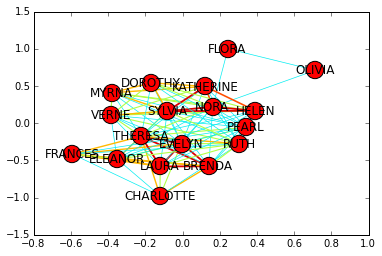

In [55]:
# Finally draw the graph
nx.draw_networkx(pacnet,width=weights,edge_color=weights)

To computer the Clubs network, we shall simply reverse the direction of projection and compute a projected graph 
on the women table rather than the Clubs table:


In [56]:
clubnet=bi.weighted_projected_graph(G,C,ratio=False)

In [57]:
weights=[math.log(edata['weight']) for f,t,edata in clubnet.edges(data=True)]

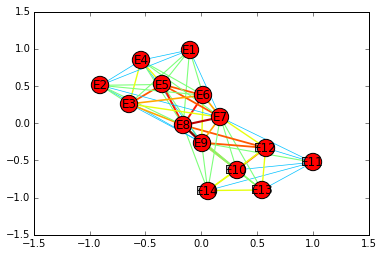

In [58]:
nx.draw_networkx(clubnet,width=weights,edge_color=weights)

We need the island method to analyze the above network.
A histogram will help in determining where to place the 'water level'. 
Histogram below shows that approximately 80% of values are weighted below 1.5, so we can safely remove them


(array([  7.,   0.,   0.,  13.,   0.,  20.,  10.,   6.,   8.,   2.]),
 array([ 0.        ,  0.21972246,  0.43944492,  0.65916737,  0.87888983,
         1.09861229,  1.31833475,  1.5380572 ,  1.75777966,  1.97750212,
         2.19722458]),
 <a list of 10 Patch objects>)

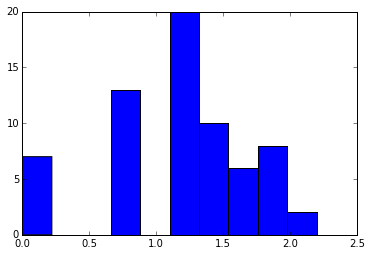

In [59]:

def trim_edges(G,weight=1):
    g2=nx.Graph()
    for f, to, edata in G.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2
plt.hist(weights)    

The weights histogram is logarithmic. 
We should compute the original weight = e^log_weight.     
Since most of the values (80%) are below 1.5, we will trim the edges to that weight readings.
And we are left with some edges which are plotted below.

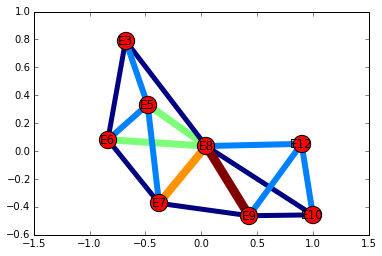

In [60]:
#print(weights)
clubnet_trim=trim_edges(clubnet,weight=math.exp(1.5))
weight=math.exp(1.5)
#print("Test weight")
#print(weight)
#re-calculate the weights based on the new graph
weights=[edata['weight'] for f,t,edata in clubnet_trim.edges(data=True)]
#print("All weights")
#print(weights)
nx.draw_networkx(clubnet_trim,width=weights,edge_color=weights)



This graph does not tell what we are interested in as its only about the events.     
So apply the island method to women instead. 

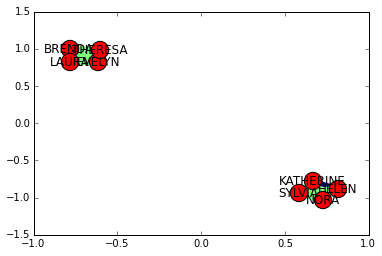

In [61]:
#print(weights)
pacnet_trim=trim_edges(pacnet,weight=math.exp(1.5))
weight=math.exp(1.5)
#print("Test weight")
#print(weight)
#re-calculate the weights based on the new graph
weights=[edata['weight'] for f,t,edata in pacnet_trim.edges(data=True)]
#print("All weights")
#print(weights)
nx.draw_networkx(pacnet_trim,width=weights,edge_color=weights)


Its very clear from the graph that certain women are closely knit and they are in two separate groups.    
This graph literally provides a justification for collecting this data as it can be explained that if more often people women attended the same event, more likely it is that they would interact and even develop relationship. Activities that involve a physical proximity enables ties to get stronger or even to happen. This analysis can be looked from a different angle. Maybe the women who had a tie/close relationship went to the event together, not the other way around.    
     
About the ease of data collection: Data for direct ties within the set is harder to collect, so data between two sets is collected, instead.       

<b>Just experimenting different layput plots:</b>





('Hello2', <type 'str'>)


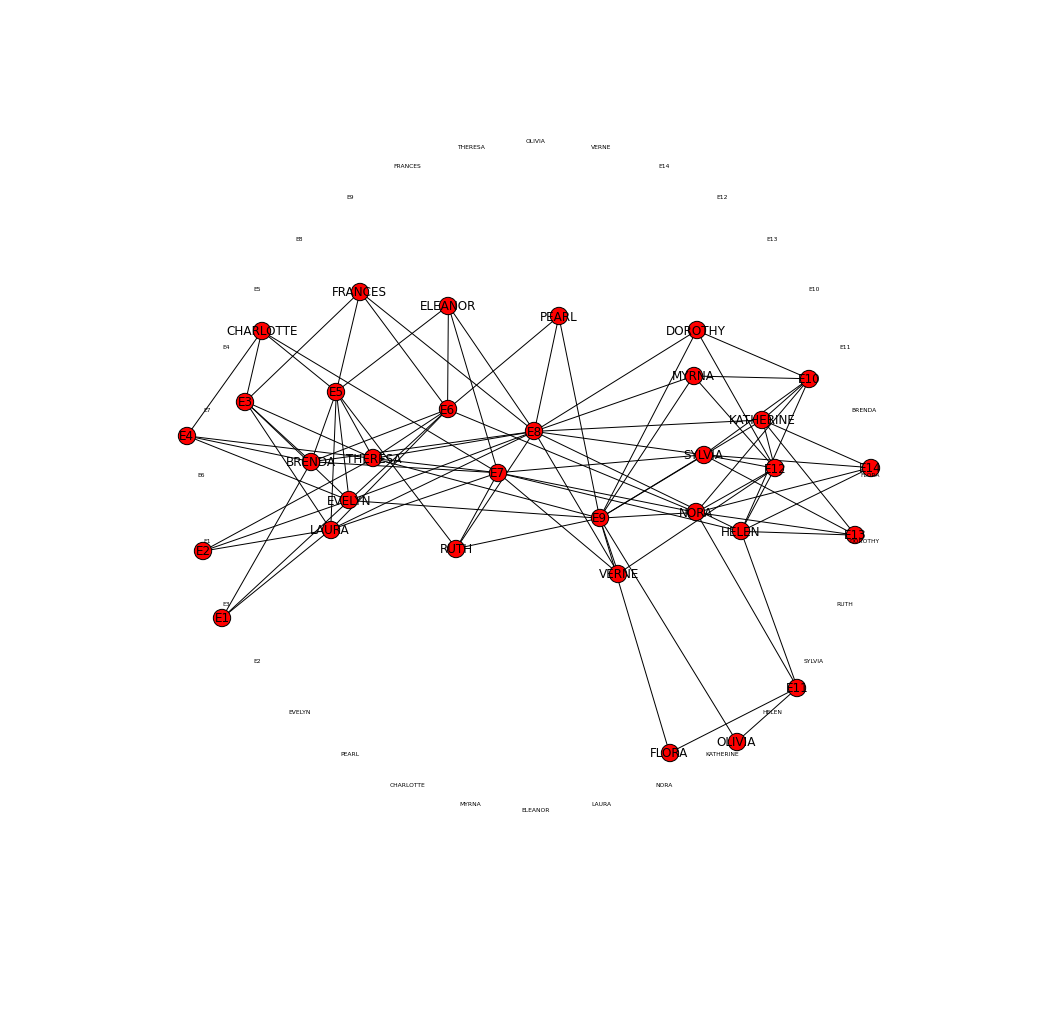

In [62]:
    # return graph and women and clubs lists
    (G,women,clubs)=davis_club_graph()
    pos=nx.circular_layout(G)
    #nx.draw_networkx_labels(G, pos)
    plt.figure(figsize=(18,18))
    plt.axis('equal')

    #draw_lifted(G, pos)
    # Draw the plot    
    nx.draw(G,with_labels=True)
    
    nx.draw_networkx_labels(G,pos,font_size=6,width=5.0,node_color='blue',node_size='18')
    plt.figure(4,figsize=(500,500)) 
   
    #### FIGURE A ######

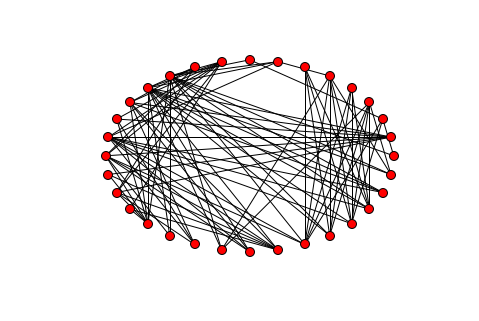

In [63]:
# second graph
pos = nx.shell_layout(G)
nx.draw(G,pos,node_size=80,font_size=8) 
# larger figure size
plt.show()

    

<b>Inference </b> It can be inferred that the interaction among women of this social network is in distinct clusters is likely to occur in the near future. That is, it predicts the absence/presence of edges between two entities that are diverse in character(heterogeneous). So, there is heavy emphasis on the links than the nodes. 
From page 96 of the text book, we understand the concept of the duality of persons and groups. People’s ideas, attitudes and social connections are shaped by membership in groups and groups in turn are shaped by its members’ attitudes. So it’s inferred that the club members of the same club will tend to have similarities in their ideas and attitudes. The weight of the inferred links between co-members of a club are emphasized when relationships are continually accumulated( page 97). The 2-mode network analysis is based on the inference of an idea of homiphily ( page 98) that sharing interests or attributes form ties between people who are very different. 
